In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from random import shuffle, seed

In [279]:
file_location = '/content/sample_data/vehicles.csv'
df = pd.read_csv(file_location)
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [280]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [282]:
# Number of records, columns
df.shape

(426880, 18)

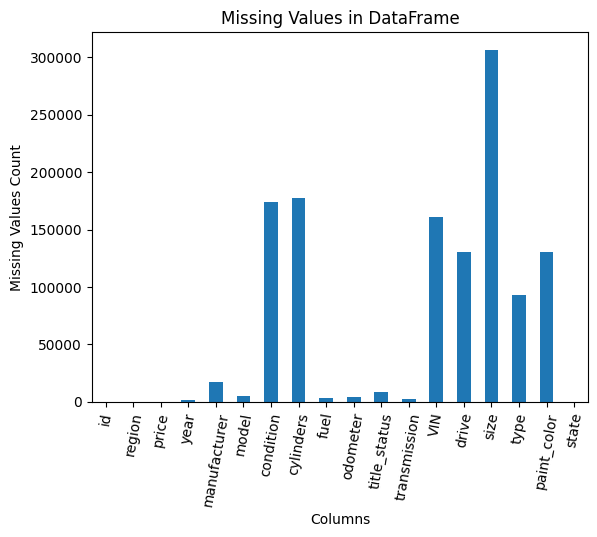

In [283]:
# Count missing values per column
missing_values = df.isnull().sum()

# Plot the missing values
missing_values.plot(kind='bar', rot=80)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

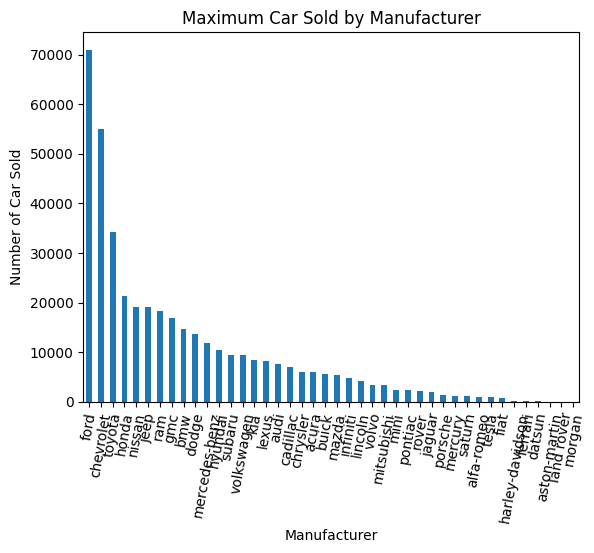

In [284]:
# Maximum Cars sold by Manufacturer
df['manufacturer'].value_counts().plot(kind='bar', rot=80)
plt.xlabel('Manufacturer')
plt.ylabel('Number of Car Sold')
plt.title('Maximum Car Sold by Manufacturer')
# plt.rcParams["figure.figsize"] = (20, 10)
plt.show()

LinearRegression Model

In [285]:
# Data Cleanup
important_features = ['year', 'odometer']
df.dropna(subset=important_features, inplace=True)
df.dropna(subset=['price'], inplace=True)
X = pd.get_dummies(df[important_features])
y = df['price']
df_linreg = LinearRegression(fit_intercept=False).fit(X, y)
df_linreg_mse = mean_squared_error(df_linreg.predict(X), y)
df_linreg_coef = df_linreg.coef_
print(df_linreg)
print(df_linreg_mse)
print(df_linreg_coef)

LinearRegression(fit_intercept=False)
150342388715750.22
[9.60210932 0.57497689]


Interpreting results based on above LinearRegression model

In [286]:
df_imp_features = pd.get_dummies(df[important_features])
df_new_features = pd.DataFrame({
    'year': [2014.0],
    'odometer': [57923.0]
})
diamond_features_encoded = pd.get_dummies(df_new_features).reindex(columns=df_imp_features.columns, fill_value=0)
df_linreg = LinearRegression(fit_intercept=False).fit(df_imp_features, df['price'])
df_prediction = df_linreg.predict(diamond_features_encoded)
df_prediction = round(df_prediction[0], 2)
print(df_prediction)

52643.03


Train/Test split

In [287]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))

(294940, 17)
(126404, 17)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Baseline Predictions

In [288]:
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(294940,) (126404,)
Baseline for training data: 121985845988557.56
Baseline for testing data: 216556448681779.72


Examining the Correlations

In [289]:
highest_corr = df[['year', 'odometer', 'price']].corr()[['price']].nlargest(columns = 'price', n = 2).index[1]
print(highest_corr)

odometer


Simple Model

In [290]:
X1 = X_train[['odometer']]
lr = LinearRegression().fit(X1, y_train)
model_1_train_mse = mean_squared_error(y_train, lr.predict(X1))
model_1_test_mse = mean_squared_error(y_test, lr.predict(X_test[['odometer']]))
print(f'Train MSE: {model_1_train_mse: .2f}')
print(f'Test MSE: {model_1_test_mse: .2f}')

Train MSE:  121985545840901.81
Test MSE:  216545131672801.19


Cross-Validation with SequentialFeatureSelector

In [291]:
split_into_half = int(df.shape[0]/2)
all_indices = list(range(0, len(df)))
seed(42)
shuffle(all_indices)
train_idx, test_idx = np.split(all_indices, [split_into_half])

X = df[['year', 'odometer']]
y = df['price']
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=1,
                                    cv = [[train_idx, test_idx]],
                                    scoring = 'neg_mean_squared_error')
Xt = selector.fit_transform(X, y)
print(Xt.shape)
lr = LinearRegression().fit(Xt, y)
model_preds = lr.predict(Xt)
mse = mean_squared_error(y, model_preds)
print(mse)

(421344, 1)
150353843538684.34


LASSO and Sequential Feature Selection

In [292]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
auto_X = df[['year', 'odometer']]
auto_y = df['price']
auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)
auto_pipe = Pipeline([
    ('polyfeatures', PolynomialFeatures(degree = 1, include_bias = False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state = 42))
])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_
lasso_train_mse = mean_squared_error(auto_y_train, auto_pipe.predict(auto_X_train))
lasso_test_mse = mean_squared_error(auto_y_test, auto_pipe.predict(auto_X_test))
print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe

<class 'numpy.ndarray'>
[-58012.61749626 176578.43985777]


Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

In [293]:
lasso_train_mse = mean_squared_error(auto_y_train, auto_pipe.predict(auto_X_train))
lasso_test_mse = mean_squared_error(auto_y_test, auto_pipe.predict(auto_X_test))
print(lasso_train_mse)
print(lasso_test_mse)

177204020986487.22
87676028236887.92


In [273]:
sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(),
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(auto_X_train, auto_y_train)
sequential_train_mse = mean_squared_error(auto_y_train, sequential_pipe.predict(auto_X_train))
sequential_test_mse = mean_squared_error(auto_y_test, sequential_pipe.predict(auto_X_test))
print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

103795485901838.44
298400396722809.25


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [274]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])

In [275]:
model_selector_pipe.fit(auto_X_train, auto_y_train)
selector_train_mse = mean_squared_error(auto_y_train, model_selector_pipe.predict(auto_X_train))
selector_test_mse = mean_squared_error(auto_y_test, model_selector_pipe.predict(auto_X_test))
print(selector_train_mse)
print(selector_test_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.418e+19, tolerance: 2.839e+15
  model = cd_fast.enet_coordinate_descent(


103751623403783.73
298436283601796.7


Bar graphs analysis good for categorical columns

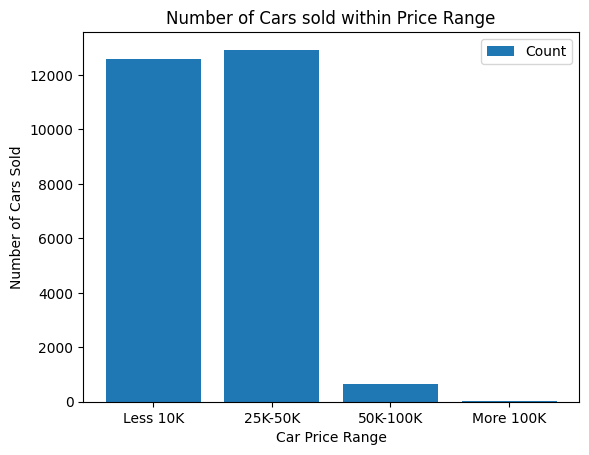

In [302]:
# Price Range
df = df[df['price']!=0].dropna()
cars_less_10k = df.query('(price<10000)')
cars_10k_25k = df.query('(price>10000) and (price<25000)')
cars_25k_50k = df.query('(price>25000) and (price<50000)')
cars_less_50k_100k = df.query('(price>50000) and (price<100000)')
cars_more_100k = df.query('(price>100000)')
fig, ax = plt.subplots()
ax.bar(['Less 10K', '25K-50K', '25K-50K', '50K-100K', 'More 100K'],
        [cars_less_10k.shape[0], cars_10k_25k.shape[0], cars_25k_50k.shape[0],
         cars_less_50k_100k.shape[0], cars_more_100k.shape[0]],
          label='Count')
ax.set_ylabel('Number of Cars Sold')
ax.set_xlabel('Car Price Range')
ax.set_title('Number of Cars sold within Price Range')
ax.legend()
plt.show()


Summary and Recommendations:

*   Most of the cars are sold within the range of 50k.
*   Year make, odometer, condition, title_status matters alot for selling cars.
*   Cars sold above range of 50k are very few and are usually new or next to new conditions.
*   Customers still prefers Gas fuel over other.
*   Top manufacturer graph would help identifying number of cars sold in the past.







